<a href="https://colab.research.google.com/github/AndresChavez123/SenalesySistemas/blob/main/Parcial1_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

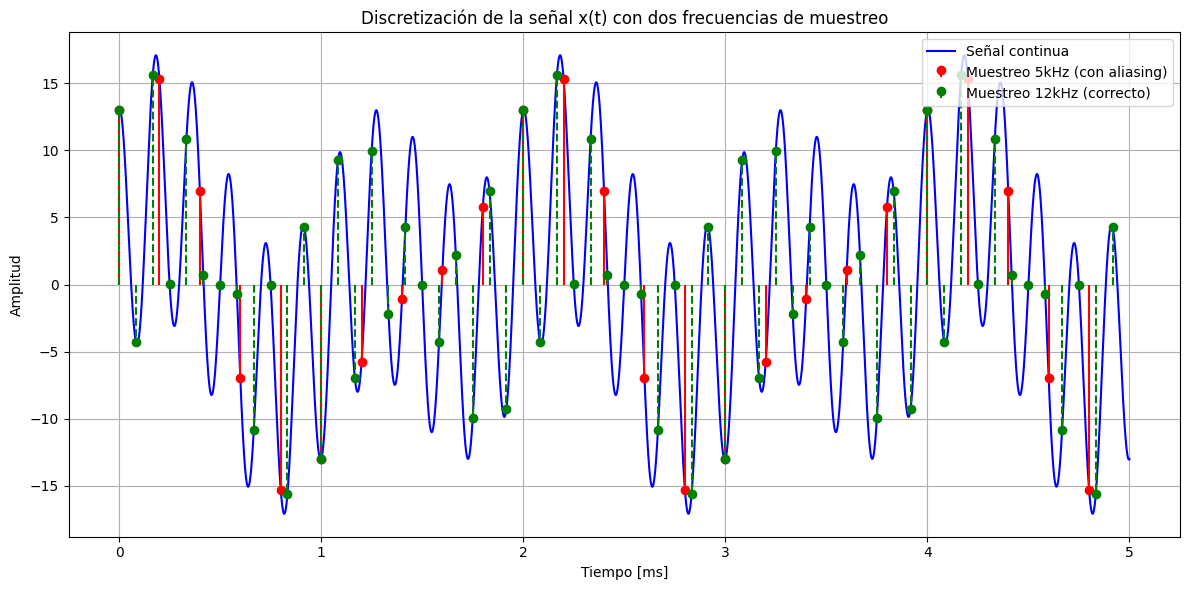

In [ ]:
# --------------------------------------------------------------------------------------------------
# DIGITALIZACIÓN DE UNA SEÑAL ANALÓGICA: ALIASING Y FRECUENCIA DE NYQUIST
# --------------------------------------------------------------------------------------------------
# En este ejemplo, analizamos la señal:
# x(t) = 3*cos(1000πt) + 5*sin(2000πt) + 10*cos(11000πt)
# y evaluamos su digitalización mediante dos frecuencias de muestreo:
#   - fs = 5000 Hz (no cumple el teorema de Nyquist)
#   - fs = 12000 Hz (sí cumple el teorema de Nyquist)
# --------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Definimos la señal continua original
def x(t):
    # La señal tiene tres componentes de frecuencia: 500 Hz, 1000 Hz y 5500 Hz
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Tiempo continuo para graficar la señal original
# Simulamos 5 milisegundos (0.005 s) con alta resolución (10,000 puntos)
t_cont = np.linspace(0, 0.005, 10000)

# Frecuencia de muestreo 1: 5 kHz
# Esta frecuencia NO es suficiente, ya que el máximo componente de frecuencia en x(t) es 5500 Hz
# Según el Teorema de Nyquist, fs debe ser al menos el doble: fs >= 2*5500 = 11000 Hz
fs1 = 5000
Ts1 = 1 / fs1
t_disc1 = np.arange(0, 0.005, Ts1)  # Instantes de muestreo con 5 kHz

# Frecuencia de muestreo 2: 12 kHz (suficiente para evitar aliasing)
fs2 = 12000
Ts2 = 1 / fs2
t_disc2 = np.arange(0, 0.005, Ts2)  # Instantes de muestreo con 12 kHz

# Muestreamos la señal en ambos conjuntos de instantes de tiempo
x_disc1 = x(t_disc1)  # Señal muestreada con fs = 5 kHz
x_disc2 = x(t_disc2)  # Señal muestreada con fs = 12 kHz

# ----------------------------------------------------
# GRAFICAMOS LA SEÑAL CONTINUA Y LAS VERSIONES MUESTREADAS
# ----------------------------------------------------
plt.figure(figsize=(12, 6))

# Señal continua
plt.plot(t_cont * 1000, x(t_cont), label="Señal continua", color='blue')
# Usamos t_cont * 1000 para mostrar el tiempo en milisegundos

# Muestreo con 5 kHz (inadecuado: produce aliasing)
plt.stem(t_disc1 * 1000, x_disc1, linefmt='r-', markerfmt='ro', basefmt=" ",
         label="Muestreo 5kHz (con aliasing)")

# Muestreo con 12 kHz (adecuado)
plt.stem(t_disc2 * 1000, x_disc2, linefmt='g--', markerfmt='go', basefmt=" ",
         label="Muestreo 12kHz (correcto)")

# Etiquetas y detalles del gráfico
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Discretización de la señal x(t) con dos frecuencias de muestreo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------------------------
# CONCLUSIONES:
# - La señal contiene una componente de 5500 Hz, por lo tanto, fs mínimo debe ser 11000 Hz.
# - Al muestrear a 5000 Hz, se viola el criterio de Nyquist y se produce aliasing: las frecuencias
#   altas se reflejan como frecuencias falsas en el dominio digital.
# - Al muestrear a 12000 Hz, se respeta el criterio de Nyquist y la digitalización es válida.
# - Esto demuestra la importancia de elegir adecuadamente la frecuencia de muestreo al diseñar
#   un sistema de adquisición de señales.
# --------------------------------------------------------------------------------------------------
